In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU {}'.format(tpu.cluster_spec().as_dict()['worker']))
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()

print("REPLICAS: {}".format(strategy.num_replicas_in_sync))

Running on TPU ['10.29.166.2:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.29.166.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.29.166.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS: 8


## Loading the Dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/TextSummarizationDataset.csv',nrows=50000)
df.head()

,review,summary
0,The materials arrived early and were in excell...,Material Great
1,I am really enjoying this book with the worksh...,Health
2,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?
3,This book was missing pages!!! Important pages...,missing pages!!
4,I have used LearnSmart and can officially say ...,Best study product out there!


## Preprocessing Data

In [ ]:
import re
def preprocess(w):
    w = w.lower().strip()
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    w = '<START> '+ w + ' <END>'
    return w

In [ ]:
df['review']= df['review'].astype(str)
df['summary']= df['summary'].astype(str)

# Filtering out reviews and summaries according to sentence lengths
df = df[df['review'].map(len)>25]
df = df[df['summary'].map(len)>15]

In [ ]:
df = df.applymap(preprocess)
df.head()

,review,summary
2,<START> if you are taking this class don t was...,<START> are you kiding me ? <END>
4,<START> i have used learnsmart and can officia...,<START> best study product out there ! <END>
5,"<START> strong backgroung , good read , quite ...",<START> e marketing th ed <END>
6,<START> if you live on mars and never heard of...,<START> mars calling earth . . . . what is int...
7,<START> i got this book on amazon and it ended...,"<START> good book , saved me a lot of money <END>"


In [ ]:
# Converting Pandas Series to Numpy Arrays
reviews,summary = df['review'].to_numpy()[:50000], df['summary'].to_numpy()[:50000]
reviews[5], summary[5]

In [ ]:
# Defining hyperparameters

MAX_LENGTH_REVIEW = 1000
MAX_LENGTH_SUMMARY = 30
MAX_SAMPLES = 50000
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
BUFFER_SIZE = 2000
NUM_LAYERS = 3
D_MODEL = 200
NUM_HEADS = 8
UNITS = 128
DROPOUT = 0.2

EPOCHS = 40

In [ ]:
tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(
    reviews + summary, target_vocab_size=7500)

# Adding the <START> and <END> tokens to the vocabulary
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

VOCAB_SIZE = tokenizer.vocab_size + 2

In [ ]:
# Optionally save the tokenizer for future use
tokenizer.save_to_file('/content/drive/My Drive/TokenizerSummerizer7.5K')

In [ ]:
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
    # Checking length of tokenized sentence
    if len(sentence1) <= MAX_LENGTH_REVIEW and len(sentence2) <= MAX_LENGTH_SUMMARY:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH_REVIEW, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH_SUMMARY, padding='post')
  
  return tokenized_inputs, tokenized_outputs


reviews, summary = tokenize_and_filter(reviews, summary)

In [ ]:
print('Vocab size: {}'.format(VOCAB_SIZE))
print('Number of samples: {}'.format(len(reviews)))

Vocab size: 7555
Number of samples: 36526


##Creating a tf.data.Dataset

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': reviews,
        'dec_inputs': summary[:, :-1]
    },
    {
        'outputs': summary[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# Unzipping GloVe Embeddings
!unzip '/content/drive/My Drive/glove6b200d.zip' -d '/content/glove'

Archive:  /content/drive/My Drive/glove6b200d.zip
  inflating: /content/glove/glove.6B.200d.txt  


In [ ]:
import os
embeddings_index = {}
f = open('/content/glove/glove.6B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((VOCAB_SIZE, 200))
print(embedding_matrix.shape)
for i, word in enumerate(word_index):
    embedding_vector = embeddings_index.get(word[:-1])
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector  

(7555, 200)


<h4><center>Scaled dot product as mentioned in the original transformer paper<center></h4>
$$\Large{Attention(Q, K, V) = softmax_k(\frac{QK^T}{\sqrt{d_k}}) V} $$

In [ ]:
def scaled_dot_product_attention(query, key, value, mask):
  """Calculate the attention weights. """
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # scale matmul_qk
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  if mask is not None:
    logits += (mask * -1e9)

  attention_weights = tf.nn.softmax(logits, axis=-1)

  output = tf.matmul(attention_weights, value)

  return output

<img src="https://www.tensorflow.org/images/tutorials/transformer/multi_head_attention.png" width="500" align='center' alt="multi-head attention">

MultiHeaded Attention

1. Dense outputs of the Value, Key and Query
2. Scaled Dot Product of the above
3. Concatentation of all dot products
4. Final Fully Connected Layer

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention",**kwargs):
    super(MultiHeadAttention, self).__init__(name=name,**kwargs)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def get_config(self):
      config = super(MultiHeadAttention,self).get_config()
      config.update({
          'num_heads':self.num_heads,
          'd_model':self.d_model,
      })
      return config  

  def split_heads(self, inputs, batch_size):
    inputs = tf.keras.layers.Lambda(lambda inputs:tf.reshape(inputs, shape=(batch_size, -1, self.num_heads, self.depth)))(inputs)
    return tf.keras.layers.Lambda(lambda inputs: tf.transpose(inputs, perm=[0, 2, 1, 3]))(inputs)

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # linear layers
    query = self.query_dense(query) # (BS,256)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # split heads
    query = self.split_heads(query, batch_size) # (BS,-1,8,32) -> (BS,8,-1,32)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # scaled dot-product attention
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.keras.layers.Lambda(lambda scaled_attention: tf.transpose(scaled_attention, perm=[0, 2, 1, 3]))(scaled_attention)
    # scaled_attention -> (BS,8,-1,32)

    concat_attention = tf.keras.layers.Lambda(lambda scaled_attention: tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model)))(scaled_attention) # (BS,-1,256)

    outputs = self.dense(concat_attention)

    return outputs

In [ ]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  return mask[:, tf.newaxis, tf.newaxis, :]

In [ ]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


In [ ]:
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask =  1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)

In [ ]:
print(create_look_ahead_mask(tf.constant([[1, 2, 0, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 0. 1.]
   [0. 0. 1. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)




---

<h4><center>Positional Encoding helps to give a positional reference to the word with respect to the other words in the sentence.
The formula for positional encodings as mentioned in <a href='https://github.com/tensorflow/examples/blob/master/community/en/position_encoding.ipynb'>this</a> paper is given as follows<center></h4>






$$\Large{PE_{(pos, 2i)} = sin(pos / 10000^{2i / d_{model}})} $$$$\Large{PE_{(pos, 2i+1)} = cos(pos / 10000^{2i / d_{model}})} $$

In [ ]:
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model, **kwargs):
    super(PositionalEncoding, self).__init__(**kwargs)
    self.position = position
    self.d_model = d_model
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_config(self):

        config = super(PositionalEncoding, self).get_config()
        config.update({
            'position': self.position,
            'd_model': self.d_model,
            
        })
        return config

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)
    # apply sin to even index in the array
    sines = tf.math.sin(angle_rads[:, 0::2])
    # apply cos to odd index in the array
    cosines = tf.math.cos(angle_rads[:, 1::2])

    pos_encoding = tf.concat([sines, cosines], axis=-1)
    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

## Defining the Encoder Model

In [ ]:
def enc_repeat(d_model,num_heads,units,inputs,padding_mask,dropout,attention_name):
  attention = MultiHeadAttention(d_model, num_heads, name=attention_name)({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  add = tf.keras.layers.add([inputs,attention])
  layer_norm = tf.keras.layers.LayerNormalization(epsilon=1e-6)(add)

  outputs = tf.keras.layers.Dense(units=units, activation='relu')(layer_norm)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  add = tf.keras.layers.add([layer_norm,outputs])
  outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(add)
  return outputs

In [ ]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")
  embeddings = tf.keras.layers.Embedding(VOCAB_SIZE, D_MODEL, weights=[embedding_matrix])(inputs)
  embeddings *= tf.keras.layers.Lambda(lambda d_model: tf.math.sqrt(tf.cast(D_MODEL, tf.float32)))(D_MODEL)
  embeddings = PositionalEncoding(VOCAB_SIZE, D_MODEL)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=DROPOUT)(embeddings)

  for i in range(NUM_LAYERS):
    outputs = enc_repeat(D_MODEL,NUM_HEADS,UNITS,outputs,padding_mask,DROPOUT,f'attention_{i}')

  model = tf.keras.models.Model(inputs=[inputs,padding_mask],outputs=outputs,name=name)
  return model

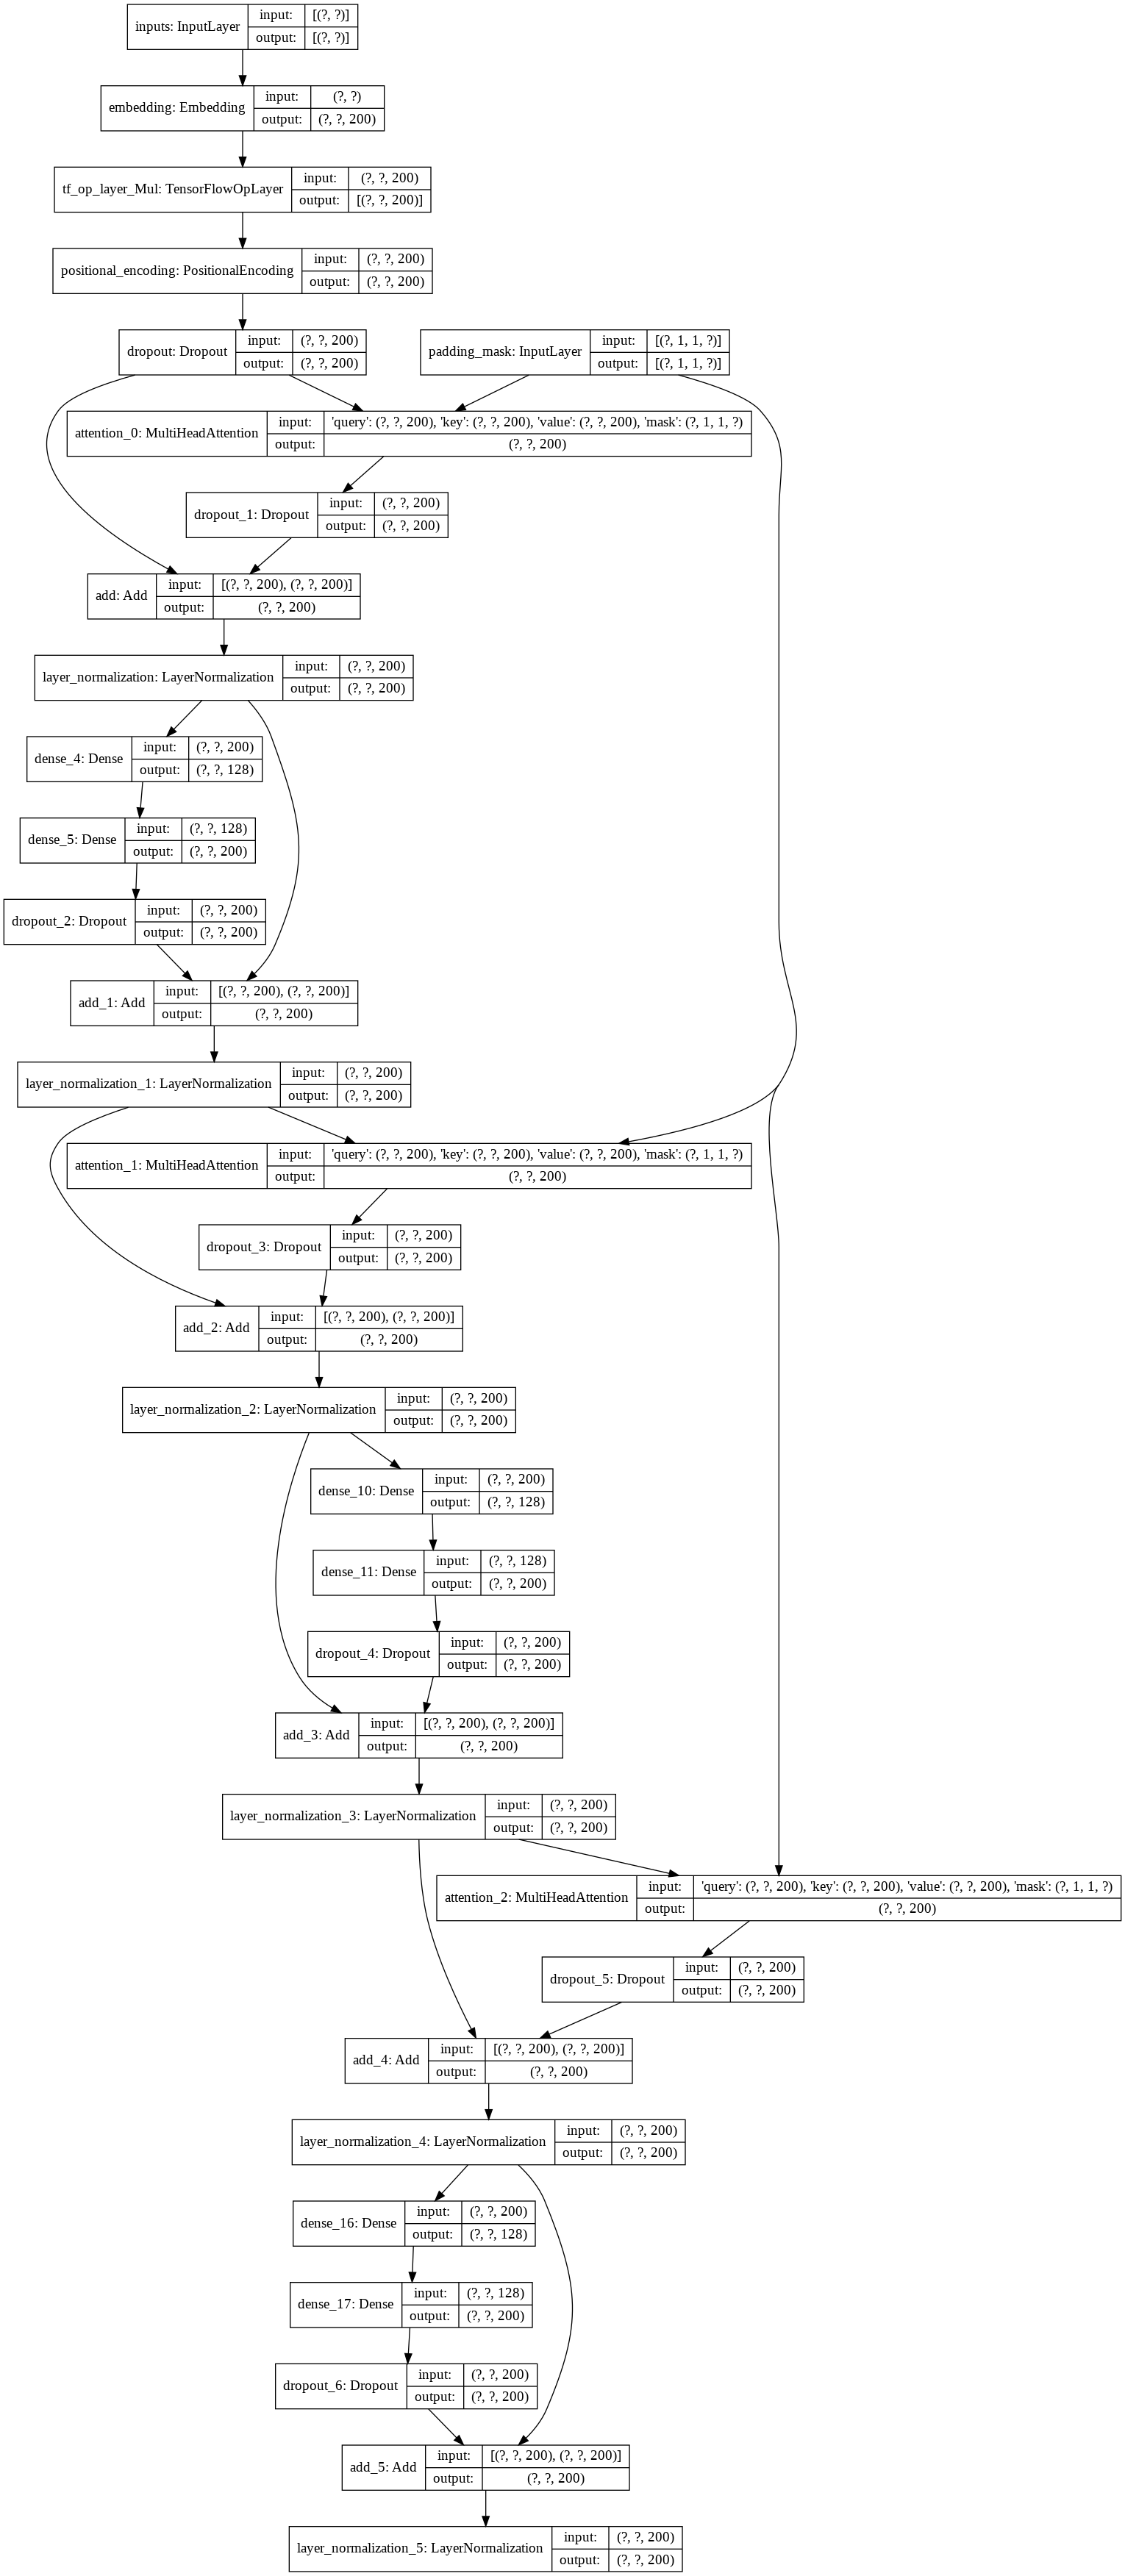

In [ ]:
tf.keras.utils.plot_model(encoder(VOCAB_SIZE,NUM_LAYERS,UNITS,D_MODEL,NUM_HEADS,DROPOUT,"sample_encoder"),
                          to_file='encoder.png', show_shapes=True)

## Defining the Decoder Model

In [ ]:
def decoder_repeat(units, d_model, num_heads, dropout, inputs,look_ahead_mask,enc_outputs,padding_mask,attention_name_1,attention_name_2,
                  name="decoder_layer"):
  attention1 = MultiHeadAttention(
      d_model, num_heads, name=attention_name_1)(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })
  add = tf.keras.layers.add([attention1,inputs])    
  attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(add)

  attention2 = MultiHeadAttention(
      d_model, num_heads, name=attention_name_2)(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  add = tf.keras.layers.add([attention2,attention1])
  attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(add)

  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  add = tf.keras.layers.add([outputs,attention2])
  outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(add)

  return outputs

In [ ]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='dec_inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  embeddings = tf.keras.layers.Embedding(vocab_size, d_model, weights=[embedding_matrix])(inputs) 
   
  embeddings *= tf.keras.layers.Lambda(lambda d_model: tf.math.sqrt(tf.cast(d_model, tf.float32)))(d_model)
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(NUM_LAYERS):
    outputs = decoder_repeat(units,d_model,num_heads,dropout,outputs,look_ahead_mask,enc_outputs,padding_mask,
                            attention_name_1=f'attention_1_{i}',attention_name_2=f'attention_2_{i}')

  return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

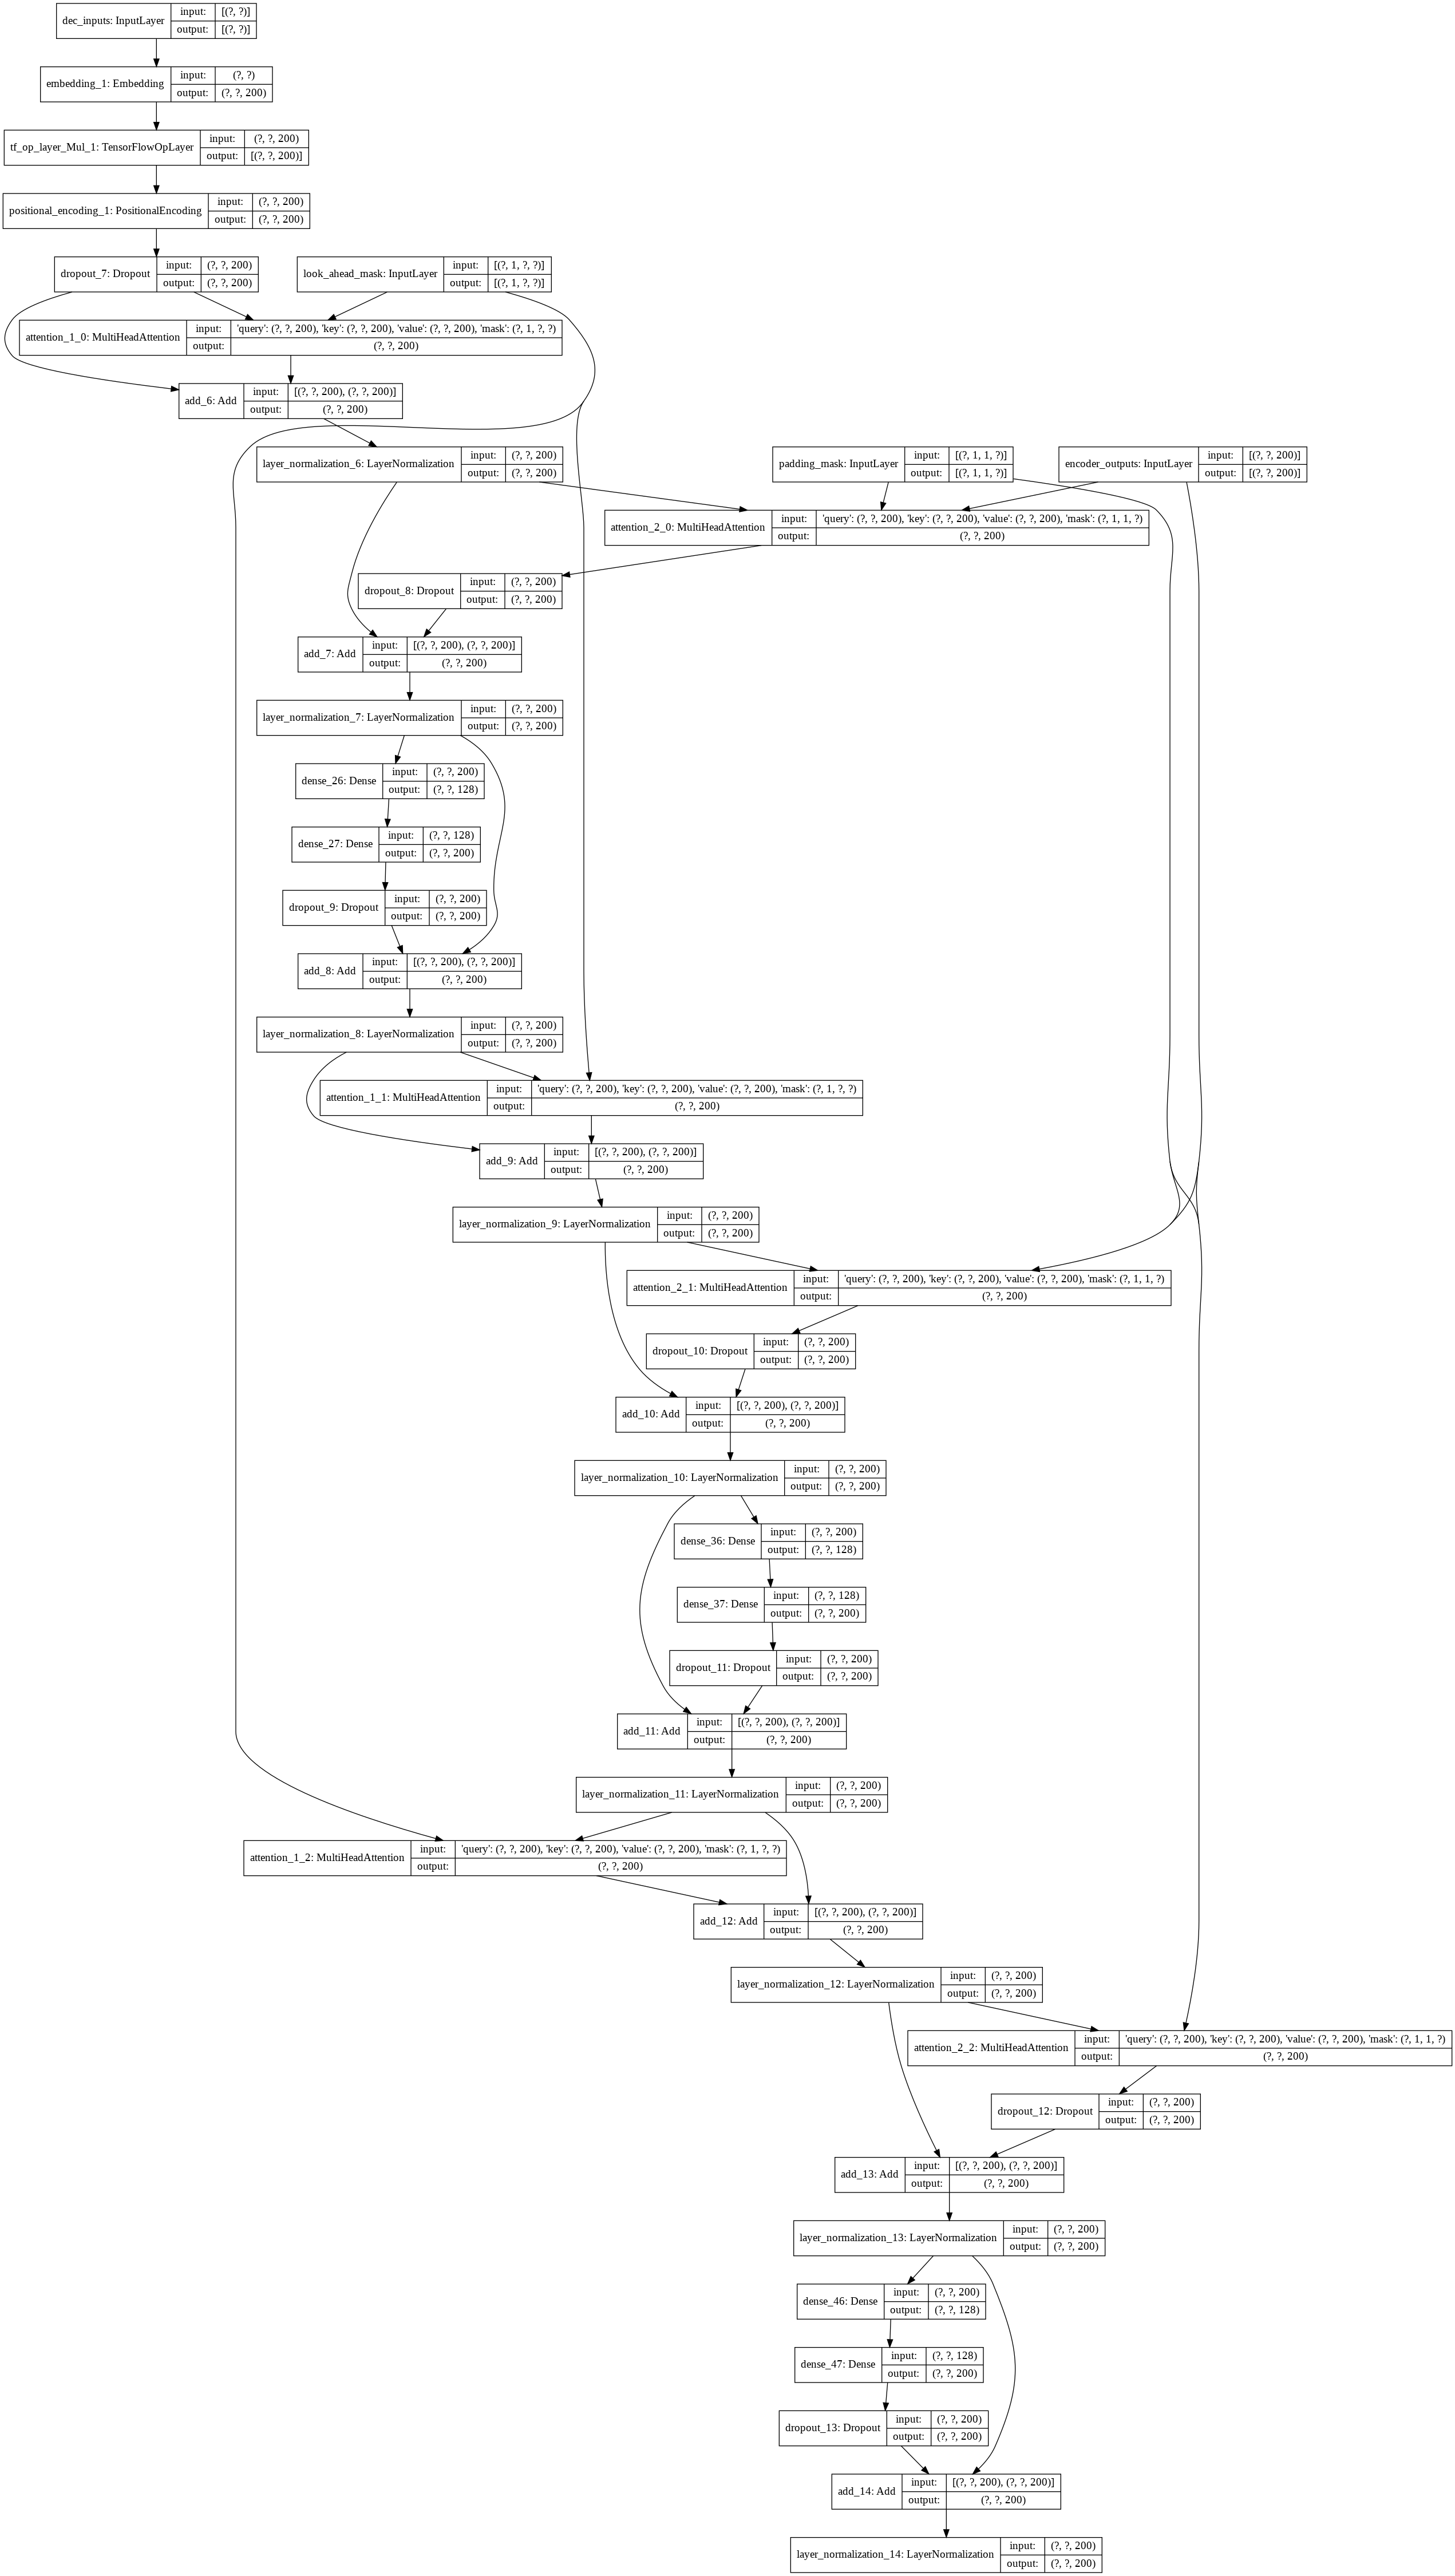

In [ ]:
tf.keras.utils.plot_model(decoder(VOCAB_SIZE,NUM_LAYERS,UNITS,D_MODEL,NUM_HEADS,DROPOUT),show_shapes=True)

## Defining the Transformer Model

In [ ]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)
  
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  dec_model = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )

  dec_outputs = dec_model(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs) 

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

[<tf.Tensor 'layer_normalization_29/Identity:0' shape=(None, None, 200) dtype=float32>] [<tf.Tensor 'dec_inputs_2:0' shape=(None, None) dtype=float32>, <tf.Tensor 'encoder_outputs_1:0' shape=(None, None, 200) dtype=float32>, <tf.Tensor 'look_ahead_mask_2:0' shape=(None, 1, None, None) dtype=float32>, <tf.Tensor 'padding_mask_4:0' shape=(None, 1, 1, None) dtype=float32>]


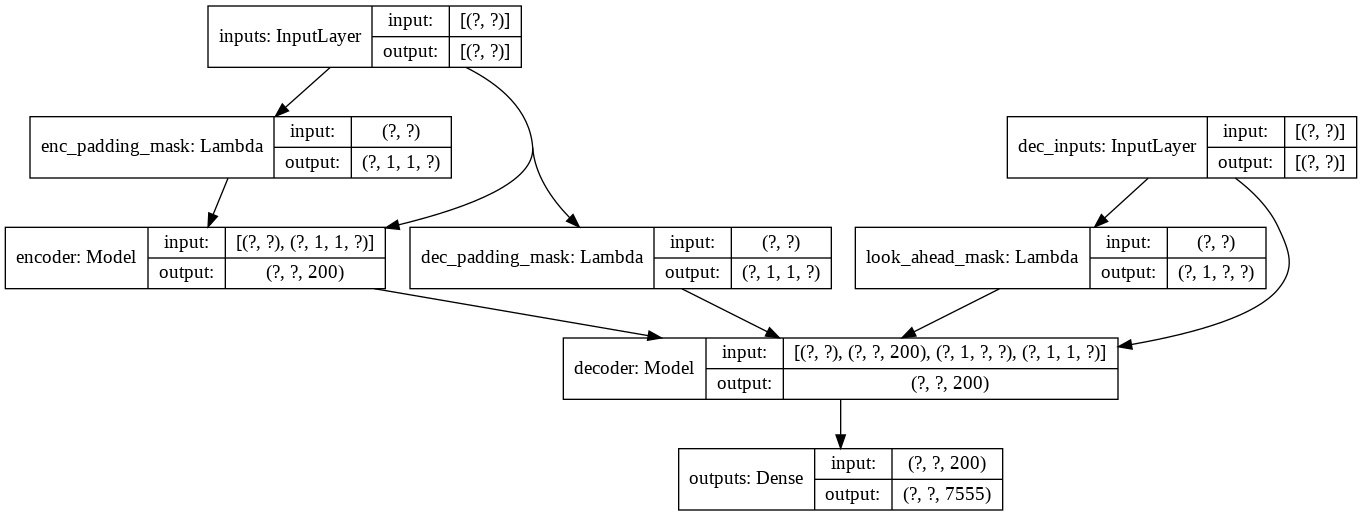

In [ ]:
tf.keras.utils.plot_model(transformer(VOCAB_SIZE,NUM_LAYERS,UNITS,D_MODEL,NUM_HEADS,DROPOUT,name="sample_transformer"), 
    to_file='transformer.png', show_shapes=True)

## Defining the Loss Function

In [ ]:
# Custom loss function to handle masks
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH_SUMMARY - 1))
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')(y_true, y_pred)
  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model=256, warmup_steps=4000,**kwargs):
    super(CustomSchedule, self).__init__(**kwargs)

    self.d_model = tf.constant(d_model,dtype=tf.float32)
    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.multiply(tf.math.rsqrt(self.d_model), tf.math.minimum(arg1, arg2))

  def get_config(self):
        return {"d_model": self.d_model,"warmup_steps":self.warmup_steps}

##Creating the Model

In [ ]:
tf.keras.backend.clear_session()

learning_rate = CustomSchedule()

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH_SUMMARY - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)


with strategy.scope():
  model = transformer(
      vocab_size=VOCAB_SIZE,
      num_layers=NUM_LAYERS,
      units=UNITS,
      d_model=D_MODEL,
      num_heads=NUM_HEADS,
      dropout=DROPOUT)

  model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
  model.summary()

[<tf.Tensor 'layer_normalization_14/Identity:0' shape=(None, None, 200) dtype=float32>] [<tf.Tensor 'dec_inputs_1:0' shape=(None, None) dtype=float32>, <tf.Tensor 'encoder_outputs:0' shape=(None, None, 200) dtype=float32>, <tf.Tensor 'look_ahead_mask_1:0' shape=(None, 1, None, None) dtype=float32>, <tf.Tensor 'padding_mask_1:0' shape=(None, 1, 1, None) dtype=float32>]
Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_ma

## Creating a Custom Callback

In [ ]:
# Creating a custom callback for printing model outputs every 5 epoch
class Callback(tf.keras.callbacks.Callback):
  def evaluate(self,sentence):
    sentence = preprocess(sentence)

    sentence = tf.expand_dims(
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    output = tf.expand_dims(START_TOKEN, 0)

    for i in range(MAX_LENGTH_SUMMARY):
      predictions = self.model(inputs=[sentence, output], training=False)

      predictions = predictions[:, -1:, :]
      predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

      if tf.equal(predicted_id, END_TOKEN[0]):
        break

      output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0)


  def predict(self,sentence):
    prediction = self.evaluate(sentence)

    predicted_sentence = tokenizer.decode(
        [i for i in prediction if i < tokenizer.vocab_size])

    print('Input: {}'.format(sentence))
    print('Output: {}'.format(predicted_sentence))

    return predicted_sentence

  def on_epoch_end(self, epoch, logs=None):
      current = logs.get("loss")
      if epoch % 5 == 0:
        print('-'*15)
        self.predict('''Product Key did not work!  Called Microsoft and they said the Key had already been activated.  Everything looks legit, nice sealed Microsoft envelope.  Win 10 DVD in another sleeve with Microsoft Licence Sticker.  I even had to peel of an official looking sticker that was covering the actual Product Key.''')
        self.predict('''I have used this product for many years on all my devices. It works well for me and is worry free. The price is not to bad also, and I think I'll be using it still in years to come''')
        print('-'*15)

In [ ]:
tf.keras.backend.clear_session()
history = model.fit(dataset,epochs=6,callbacks=[Callback()])

Epoch 1/6
286/286 [==============================] - ETA: 0s - loss: 0.7431 - accuracy: 0.3048---------------
Input: Product Key did not work!  Called Microsoft and they said the Key had already been activated.  Everything looks legit, nice sealed Microsoft envelope.  Win 10 DVD in another sleeve with Microsoft Licence Sticker.  I even had to peel of an official looking sticker that was covering the actual Product Key.
Output: <START> microsoft money plus deluxe old version <END>
Input: I have used this product for many years on all my devices. It works well for me and is worry free. The price is not to bad also, and I think I'll be using it still in years to come
Output: <START> good product for the price <END>
---------------
286/286 [==============================] - 52s 181ms/step - loss: 0.7431 - accuracy: 0.3048
Epoch 2/6
286/286 [==============================] - 37s 129ms/step - loss: 0.7296 - accuracy: 0.3068
Epoch 3/6
286/286 [==============================] - 37s 129ms/step 

## Visualizing the Training

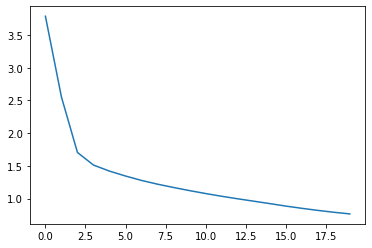

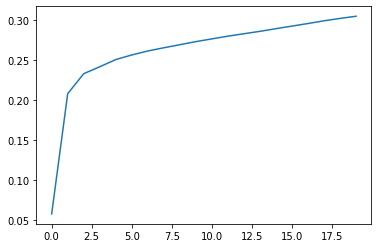

In [ ]:
# First 20 Epochs
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.show()
plt.plot(history1.history['accuracy'])
plt.show()

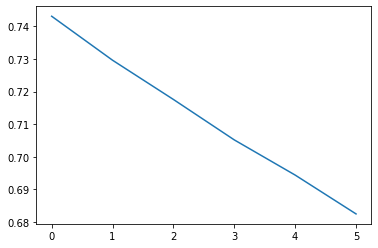

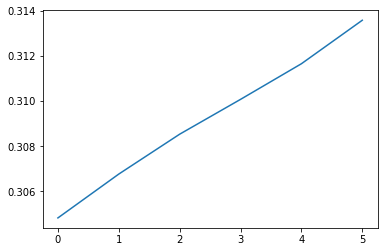

In [ ]:
# 40-46 Epochs
plt.plot(history.history['loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.show()

## Inference Step

In [ ]:
def evaluate(sentence):
  sentence = preprocess(sentence)

  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  output = tf.expand_dims(START_TOKEN, 0)

  for i in range(MAX_LENGTH_SUMMARY):
    predictions = model(inputs=[sentence, output], training=False)

    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0)


def predict(sentence):
  prediction = evaluate(sentence)

  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('Input: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence

In [ ]:
predict('''Needed this to put on personal computer to do grad work. Using Google was not good enough.  LOVE the APA formatted paper made this purchase worth every penny!''')
predict('''My program on CD would not install.  Intuit provides no support.  The site is set up to avoid questions.  There is no support on the web site for this kind of issue; and when I tried to speak to someone  I got an endless loop returning to the "options" list.  I will return the product and get something usable''')

Input: Needed this to put on personal computer to do grad work. Using Google was not good enough.  LOVE the APA formatted paper made this purchase worth every penny!
Output: <START> great for the price <END>
Input: My program on CD would not install.  Intuit provides no support.  The site is set up to avoid questions.  There is no support on the web site for this kind of issue; and when I tried to speak to someone  I got an endless loop returning to the "options" list.  I will return the product and get something usable
Output: <START> not compatible with anything <END>


'<START> not compatible with anything <END>'

In [ ]:
model.save('TextSummarizer.h5',include_optimizer=False)

### Loading the saved model

In [ ]:
with strategy.scope():
  model = tf.keras.models.load_model('TextSummarizer.h5',
                                     custom_objects={'MultiHeadAttention':MultiHeadAttention,
                                                     'PositionalEncoding':PositionalEncoding})
  model.compile(optimizer=optimizer, loss=[loss_function], metrics=[accuracy])

### Compressing the model for saving

In [ ]:
import gzip
with open('TextSummarizer.h5', 'rb') as src, gzip.open('TextSummarizer.gz', 'wb') as dst:        
    dst.writelines(src)